In [2]:
import torch
from torch.utils import data
from torchvision import transforms
from torchvision import datasets
from d2l import torch as d2l

In [3]:
trans = transforms.ToTensor()

In [4]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [5]:
for X, y in train_iter:
    print(X.shape)  # 图像张量的形状
    print(y.shape)  # 标签张量的形状
    break           # 只取一个批量就停


torch.Size([256, 1, 28, 28])
torch.Size([256])


In [6]:
def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return [text_labels[int(i)] for i in labels]

In [7]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  # @save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

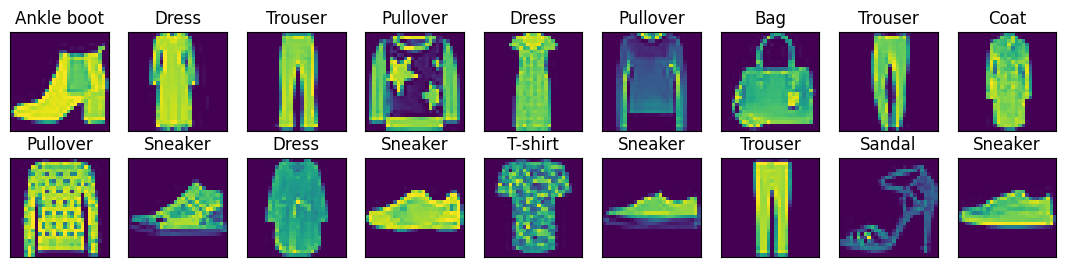

In [8]:
X, y = next(iter(train_iter))
d2l.show_images(X[0:18].squeeze(1), 2, 9, titles=get_fashion_mnist_labels(y[0:18]));